# Classification of Mushrooms using Machine Learning | Dataset handling

In [2]:
%pip install opencv-python -q
%pip install matplotlib -q
%pip install tqdm -q

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


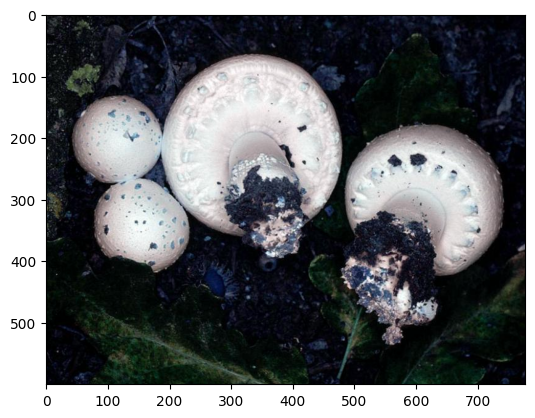

9
['Agaricus', 'Amanita', 'Boletus', 'Cortinarius', 'Entoloma', 'Hygrocybe', 'Lactarius', 'Russula', 'Suillus']


In [6]:
import numpy as np
import matplotlib.pyplot as plt 
import os 
import cv2 
from tqdm import tqdm

DATADIR = "./dataset/"
categories = list()
for root,dirs,files in os.walk(DATADIR,topdown=False):
    #print(dirs)
    for name in dirs:
        categories.append(name)


for category in categories:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break
print(len(categories))
print(categories)

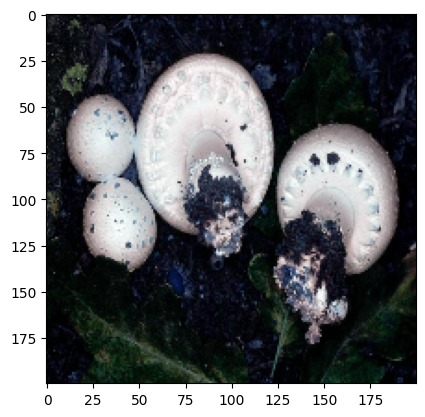

In [22]:
IMG_SIZE = 200
temp_array  = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(temp_array)
plt.show()

In [7]:

training_data = []
def create_training_data():
    for category in categories:
        path = os.path.join(DATADIR,category)
        class_number = categories.index(category)
        print(f"Creating training data for {category}")
        print(len(os.listdir(path)))
        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_number])
            except Exception as e:
                pass  
create_training_data()        

Creating training data for Agaricus
353


100%|██████████| 353/353 [00:04<00:00, 83.51it/s] 


Creating training data for Amanita
750


100%|██████████| 750/750 [00:07<00:00, 98.76it/s] 


Creating training data for Boletus
1073


100%|██████████| 1073/1073 [00:10<00:00, 102.59it/s]


Creating training data for Cortinarius
836


100%|██████████| 836/836 [00:08<00:00, 99.83it/s] 


Creating training data for Entoloma
364


100%|██████████| 364/364 [00:03<00:00, 111.15it/s]


Creating training data for Hygrocybe
316


100%|██████████| 316/316 [00:02<00:00, 111.01it/s]


Creating training data for Lactarius
1563


100%|██████████| 1563/1563 [00:14<00:00, 108.49it/s]


Creating training data for Russula
1148


100%|██████████| 1148/1148 [00:10<00:00, 114.13it/s]


Creating training data for Suillus
311


100%|██████████| 311/311 [00:02<00:00, 106.34it/s]


In [8]:
import random
random.shuffle(training_data)

In [14]:

for sample in training_data[:10]:
    print(categories[sample[1]], sample[1])

Agaricus 0
Boletus 2
Entoloma 4
Entoloma 4
Hygrocybe 5
Lactarius 6
Amanita 1
Lactarius 6
Lactarius 6
Cortinarius 3


In [15]:
X = []
y = []

In [16]:
for features, label in training_data:
    X.append(features)
    y.append(label)
print(max(y))
X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)

8


In [18]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()
pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()